In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

from tqdm.auto import tqdm

import os
import json
import pickle

import sys
sys.path.append("../")
from src.postprocessing import collect_results, create_C_S

idx = pd.IndexSlice

In [28]:
# grandi syn
folder_name_src = "/home/common/pikunov.av/pypoptim/results/grandi/syn"
folder_name_dst = "../results/grandi/syn"

model_name = 'grandi'

true_path = "../data/grandi/syn/phenotypes"
items = ['Na_i', 'Ca_sr', 'K_i']

# v
case_list = ["210310_223451", "210311_000513", "210311_013721", "210311_025338", "210311_042913",\
            "210311_062128", "210311_075523", "210311_093706", "210311_110839", "210311_125300"]

n_v = len(case_list)

# v & cai
case_list += ['210311_201931',
 '210311_212910',
 '210311_225250',
'210312_003349',
 '210312_015135',
 '210312_033123',
             ]

In [2]:
# maleckar syn
folder_name_src = "/home/common/pikunov.av/pypoptim/results/maleckar/syn"
folder_name_dst = "../results/maleckar/syn"

model_name = 'maleckar'

true_path = "../data/maleckar/original/phenotypes"
items = ['Na_i', 'Ca_rel', 'K_i']

# v
case_list = ['210310_225257',
 '210311_013640',
 '210311_032555',
 '210311_054743',
 '210311_073531',
 '210311_094906',
 '210311_115017',
 '210311_135420',
 #'210311_160744',  broken
 '210311_161211']

n_v = len(case_list)

# v & cai
case_list += ['210311_202842',
 '210311_222521',
 '210312_004138',
 '210312_023219',
 '210312_051724'] + ['210313_151517',
 '210313_182307',
 '210313_214123',
 '210314_001940',
 '210314_025419',
 '210314_052745',
 '210314_082104',
 '210314_114224',
 '210314_145656',
 '210314_175726']

In [6]:
# koivumaki syn
folder_name_src = "/home/common/pikunov.av/pypoptim/results/koivumaki/syn"
folder_name_dst = "../results/koivumaki/syn"

model_name = 'koivumaki'

true_path = "../data/koivumaki/original/phenotypes"
items = ['Nai', 'CaSR', 'Ki']

# # v
# case_list = ['210311_225305',
#  '210312_051614',
#  '210312_113740',
#  '210312_180918',
#  '210313_002351',
#  '210313_070541',
#  '210313_130459', # broken
#  ]

# n_v = len(case_list)

# # v ca
# # case_list += ['210311_225555', '210312_090417'] + ['210313_151417',
# #  '210313_213301',
# #  '210314_040130',
# #  '210314_103504',
# #  '210314_165914',
# #  '210314_235019',
# #  '210315_061328',
# #  #'210315_123458', # broken 
# # ]

# case_list += ['210317_115717', '210317_183542', '210318_011304', '210318_075304']



# AP
case_list = ['210408_193146',
 '210408_213459',
 '210408_233001',
 '210409_013215',
 '210409_032943',
 '210409_053423',
 #'210409_072735',
            ]
n_v = len(case_list)

# CaT
case_list += ['210413_134829',
 '210413_154449',
 '210413_174037',
 '210413_193747',
 '210413_213549',
 '210413_233310',
 # '210414_013111',
            ]

In [7]:
target_dict = {c: 'v' if i < n_v else 'v_ca' for i, c in enumerate(case_list)}

In [9]:
result = []

for i, case in enumerate(case_list):
    df = pd.read_csv(os.path.join(folder_name_dst, case, 'genes_best.csv'), index_col=[0, 1])
    result.append(df.rename(columns={'0': case}))
    
df = pd.concat(result, axis=1)

with open(os.path.join(folder_name_dst, case, 'config_backup.pickle'), 'rb') as f:
    config = pickle.load(f)
    
CL_list = [2000, 1000, 666, 500]


state = pd.concat({CL: pd.read_csv(os.path.join(true_path, f"phenotype_{CL}.csv")).iloc[-1] for CL in CL_list}, axis=1)

true = df.iloc[:, 0].copy()
true.name = 'true'
true.loc['common'] = 1

for CL in CL_list:
    for item in items:
        true[(str(CL), item)] = state[CL][item]
        
df = pd.concat([df, true], axis=1)
df

210408_193146  210408_213459  210408_233001  \
ec_name g_name                                                         
common  PNa                   1.148924       0.964745       0.997223   
        gCaL                  0.787996       0.986572       0.840388   
        gt                    0.810760       1.040891       0.854852   
        gKur                  0.804231       0.975496       0.814452   
        gK1                   0.891675       0.911378       0.949170   
        gKr                   0.686777       0.791191       0.190481   
        gKs                   5.710866       3.801521       5.782039   
        gNab                  0.913292       0.506117       2.380167   
        gCab                  1.022042       1.021907       0.597810   
        INaKmax               0.814651       1.030402       0.877332   
        ICaPmax               1.080550       0.557559       0.205195   
        gIf                   1.115413       2.558537       0.394073   
        kNaCa                 0.874192       1.105651       0.714924   
        Jrel_multiplier       1.006977       1.135811       1.057929   
        cpumps                1.704357       0.978199       1.990970   
        kSRleak               0.277546       0.402005       0.151695   
2000    Nai                   9.790687       8.164766       9.640507   
        Ki                  142.307177     137.632587     140.433233   
        CaSR                  1.306995       0.686571       1.142858   
1000    Nai                  11.191152       9.299643      11.046528   
        Ki                  139.517317     136.143685     139.037577   
        CaSR                  1.283150       0.629790       1.234813   
666     Nai                  13.053176      10.777977      12.995040   
        Ki                  137.289137     133.067380     139.887463   
        CaSR                  1.338998       0.638302       1.368832   
500     Nai                  14.765125      12.354264      14.737032   
        Ki                  135.562161     132.710573     138.470625   
        CaSR                  1.396121       0.682117       1.477537   

                         210409_013215  210409_032943  210409_053423  \
ec_name g_name                                                         
common  PNa                   0.967615       1.053931       0.952033   
        gCaL                  0.956298       0.716823       1.078886   
        gt                    0.962604       0.806247       1.009376   
        gKur                  0.875854       0.837506       1.228465   
        gK1                   0.946029       0.772857       0.940010   
        gKr                   0.563023       0.477514       0.460985   
        gKs                   3.681950       6.337657       5.522526   
        gNab                  1.029728       1.373355       0.532327   
        gCab                  0.918036       0.598822       1.049339   
        INaKmax               0.930432       0.758888       1.110480   
        ICaPmax               0.199887       0.301779       0.418085   
        gIf                   2.160875       1.829695       2.291648   
        kNaCa                 0.947063       0.900398       1.405201   
        Jrel_multiplier       1.161268       2.955070       0.812539   
        cpumps                1.108211       1.917614       0.733621   
        kSRleak               1.096639       0.550281       0.640447   
2000    Nai                   9.155008       9.480504       7.937120   
        Ki                  138.294990     137.591099     136.868011   
        CaSR                  0.810753       0.653294       0.547846   
1000    Nai                  10.386435      10.880174       9.142460   
        Ki                  136.505680     135.504966     135.653578   
        CaSR                  0.785742       0.656692       0.532177   
666     Nai                  12.116537      12.821896      10.639499   
        Ki                  136.672583     133.954330     133.77

In [10]:
df_common = df.loc['common'].T.copy()
df_common = np.log10(df_common)
df_common = df_common.stack().reset_index()
df_common.rename(columns={'level_0': 'case', 0: 'x'}, inplace=True)
df_common['target'] = df_common['case'].replace(target_dict)

/home/andrey/WORK/HPL/Code/conda_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


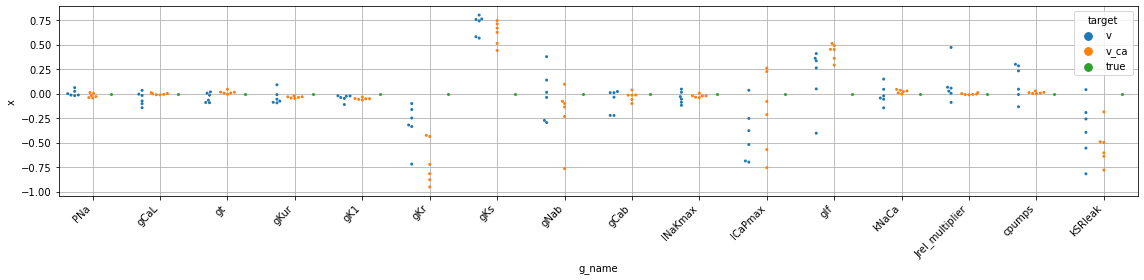

In [11]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.25))

sns.swarmplot(data=df_common, x='g_name', y='x', hue='target',
              dodge=True, size=3, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid()

plt.tight_layout()

#plt.savefig("../images/synthetic/koivumaki/currents.png")

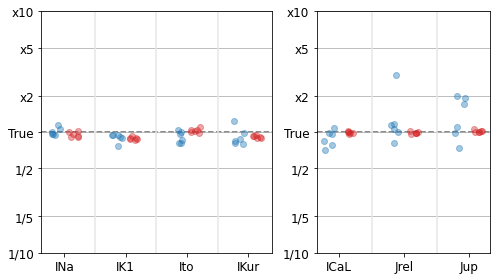

In [13]:
# maleckar
groups = ['P_Na', 'g_K1', 'g_t', 'g_kur'], ['g_Ca_L', 'alpha_rel', 'I_up_max']
xtickslabels_list = ['INa', 'IK1', 'Ito', 'IKur'], ['ICaL', 'Jrel', 'Jup']

# koivumaki
groups = ['PNa', 'gK1', 'gt', 'gKur'], ['gCaL', 'Jrel_multiplier', 'cpumps'] # ['gCaL', 'Jrel_multiplier', 'J_SERCASR_multiplier', 'J_bulkSERCA_multiplier']
xtickslabels_list = ['INa', 'IK1', 'Ito', 'IKur'], ['ICaL', 'Jrel', 'Jup'] # ['ICaL', 'Jrel', 'Jup_sr', 'Jup_bulk']

# # grandi
# groups = ['INa_scaler', 'IK1_scaler', 'Ito_scaler', 'IKur_scaler'], ['ICaL_scaler', 'Jrel_scaler', 'Jserca_scaler']
# xtickslabels_list = ['INa', 'IK1', 'Ito', 'IKur'], ['ICaL', 'Jrel', 'Jup']

lens = list(map(len, groups))

fig, axes = plt.subplots(1, len(groups), figsize=plt.figaspect(4 / sum(lens))*1, gridspec_kw=dict(width_ratios=lens))

for group, xtickslabels, ax in zip(groups, xtickslabels_list, axes):
    
    plt.sca(ax)
    ylim = ax.get_ylim()
    yticks = np.array([1/10, 1/5, 1/2, 1, 2, 5, 10])
    yticks = np.log10(yticks)
    yticklabels = ['1/10', '1/5', '1/2', 'True', 'x2', 'x5', 'x10']
    plt.yticks(yticks, yticklabels, size='large')
    plt.tick_params(labelsize='large')
    plt.ylim(-1, 1)

    mask = df_common.g_name.isin(group) & (df_common.target != 'true')
    
#     sns.stripplot(data=df_common[mask], x='g_name', y='x', hue='target',
#                   dodge=True, alpha=0.75,
#                   size=5, ax=ax)

    for i_scaler, scaler in enumerate(group):
        df_scaler = df_common[(df_common.g_name == scaler) & (df_common.target != 'true')]
        for _, row in df_scaler.iterrows():
            i_target = -0.15 if row['target'] == 'v' else 0.15
            color = 'C0' if row['target'] == 'v' else 'C3'
            y = row.x 
            x = i_target + i_scaler + (np.random.random() - 0.5) / 6
            ax.plot(x, y, 'o', color=color, alpha=0.4,
                    #markerfacecolor='w',
                    ms=6)
    
    ax.axhline(0, ls='--', zorder=0, color='0.4')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    #ax.set_title('Log$_{10}$(Scaler)')
    
    for i in range(len(group) - 1):
        ax.axvline(i + 0.5, color='0.9')
    
    ax.set_xticks(np.arange(len(group)))
    ax.set_xticklabels(xtickslabels)
    ax.grid(axis='y')
    
plt.tight_layout()

# plt.subplots_adjust(top=0.85)
# fig.suptitle(f'{model_name} model')

plt.savefig(f"../images/synthetic/{model_name}/currents_groups.png")

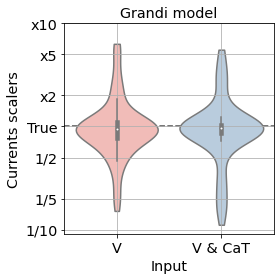

In [14]:
fig, ax = plt.subplots(figsize=plt.figaspect(1))

sns.violinplot(data=df_common[df_common.target != 'true'], x='target', y='x',
              ax=ax, cut=0, inner='box', palette="Pastel1")

# sns.swarmplot(data=df_common[df_common.target != 'true'], x='target', y='x',
#               size=2, ax=ax, color='white')

ax.axhline(0, color='0.3', ls='--', zorder=-10)

#plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

yticks = np.array([1/10, 1/5, 1/2, 1, 2, 5, 10])
yticks = np.log10(yticks)
yticklabels = ['1/10', '1/5', '1/2', 'True', 'x2', 'x5', 'x10']
plt.yticks(yticks, yticklabels, size='x-large')

xticks = ax.get_xticks()
plt.xticks(xticks, ['V', 'V & CaT'], size='x-large')

plt.xlabel('Input', size='x-large')
plt.ylabel('Currents scalers', size='x-large')

plt.title('Grandi model', size='x-large')

ax.grid()

plt.tight_layout()

#plt.savefig("../images/synthetic/grandi/scalers_simplified.png")

In [15]:
df_conc = df.stack().reset_index()
df_conc = df_conc[~df_conc.ec_name.isin(['common'])]
df_conc.rename(columns={'level_2': 'case',
                        0: 'value',
                        'ec_name': 'CL'}, inplace=True)
df_conc['target'] = df_conc['case'].replace(target_dict)
#df_conc

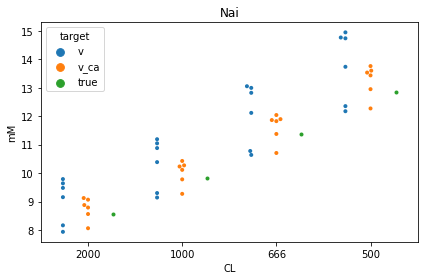

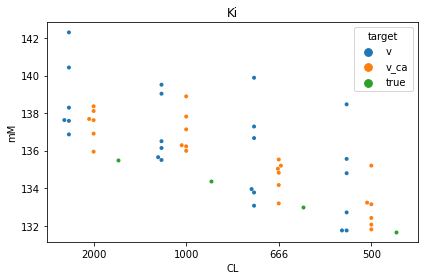

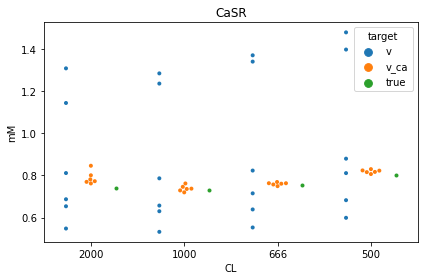

In [16]:
for g_name in df_conc.g_name.unique():

    sns.swarmplot(data=df_conc[df_conc.g_name == g_name], x='CL', y='value', hue='target',
                  dodge=True, size=4)
    
    plt.ylabel('mM')
    plt.title(g_name)
    plt.tight_layout()
    #plt.savefig(f"../images/synthetic/koivumaki/{g_name}.png")
    plt.show()

In [236]:
CL_list = [2000, 1000, 666, 500]

result = {}

for item in items:
    result[item] = []
    
    df_item = df_conc[df_conc.g_name == item]

    for CL in CL_list:
        CL = str(CL)
        df_CL = df_item[df_item.CL == CL].copy()
        tr = df_CL[df_CL.case == 'true'].value.values[0]
        df_CL.value = (df_CL.value - tr) / tr * 100

        df_CL = df_CL[df_CL.target != 'true']
        result[item].append(df_CL[['value', 'target']])
    
    result[item] = pd.concat(result[item]).reset_index(drop=True)
    
result = pd.concat(result, axis=1)
result

Nai              CaSR               Ki       
        value target      value target     value target
0    2.302864      v -32.641938      v  4.539536      v
1    0.385035      v  -3.561474      v  0.831846      v
2   10.922495      v -56.467412      v  2.449673      v
3    1.860407      v -48.912228      v  0.175912      v
4   13.585323      v -16.647204      v  0.498074      v
5    0.589437      v -43.708612      v  4.057450      v
6   -1.796975      v -57.525999      v  2.454343      v
7    7.998764   v_ca   2.632102   v_ca  1.213237   v_ca
8    0.619346   v_ca   2.402785   v_ca  1.526217   v_ca
9   -3.247512   v_ca   7.730232   v_ca  1.985345   v_ca
10 -10.553537   v_ca  14.264822   v_ca  3.064681   v_ca
11   2.351863      v -33.943250      v  2.412135      v
12   0.366666      v  -2.200746      v  0.575128      v
13   9.094733      v -53.103807      v  3.292646      v
14   1.787782      v -47.105923      v  0.033250      v
15  12.966669      v -11.054415      v  1.661967      v
16   0.150870      v -41.501852      v  3.139568      v
17  -0.425257      v -50.445846      v  0.732638      v
18   7.832870   v_ca  -2.168955   v_ca  1.218850   v_ca
19   0.087829   v_ca  -2.505118   v_ca  2.687317   v_ca
20  -4.099146   v_ca   0.957179   v_ca  3.378930   v_ca
21 -10.463268   v_ca   5.641809   v_ca  1.510139   v_ca
22   2.220084      v -34.020255      v -0.286102      v
23   2.372980      v  -0.410363      v -0.201312      v
24   8.495292      v -49.432636      v  1.943624      v
25   2.253668      v -45.345629      v -2.166680      v
26  14.662695      v  -1.540204      v  1.696468      v
27   0.043267      v -39.283925      v  0.553810      v
28   0.126112      v -46.247663      v -1.584543      v
29   8.522928   v_ca  -0.954397   v_ca -1.224750   v_ca
30   0.584870   v_ca  -2.236670   v_ca  1.067127   v_ca
31  -3.585359   v_ca  -0.625936   v_ca  2.528104   v_ca
32  -9.652068   v_ca   1.936541   v_ca  1.454972   v_ca
33   3.298528      v -32.634078      v -2.100915      v
34   4.083885      v   3.635940      v  0.712266      v
35   9.482070      v -46.198376      v  2.435232      v
36   3.049846      v -43.519244      v -3.396948      v
37  17.104901      v   9.054246      v  2.330093      v
38   0.665965      v -36.855120      v -0.426752      v
39   0.787961      v -42.548341      v -3.013557      v
40  10.204150   v_ca   1.805068   v_ca -1.392173   v_ca
41   1.639626   v_ca  -0.227426   v_ca  2.298090   v_ca
42  -2.889074   v_ca  -0.468908   v_ca  3.170820   v_ca
43  -8.445055   v_ca   0.558800   v_ca  1.680018   v_ca

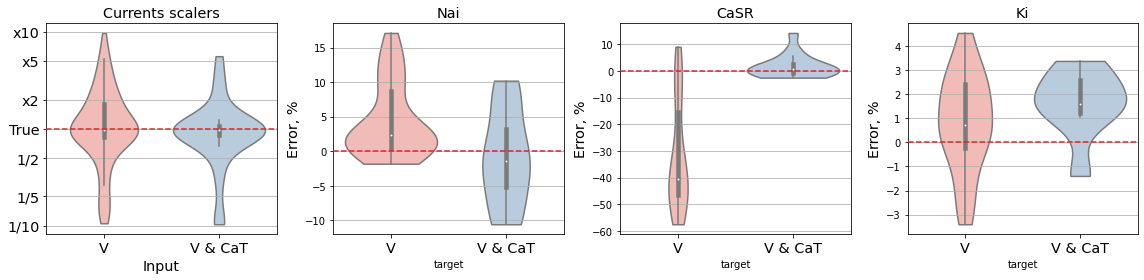

In [237]:
fig, axes = plt.subplots(ncols=4, figsize=plt.figaspect(0.25))

color_true = 'C3'

ax = axes[0]
plt.sca(ax)

sns.violinplot(data=df_common[df_common.target != 'true'], x='target', y='x',
               ax=ax, cut=0, inner='box', palette="Pastel1")

# sns.swarmplot(data=df_common[df_common.target != 'true'], x='target', y='x',
#               size=, ax=ax, color='white')

ax.axhline(0, color=color_true, ls='--', zorder=10)

#plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

yticks = np.array([1/10, 1/5, 1/2, 1, 2, 5, 10])
yticks = np.log10(yticks)
yticklabels = ['1/10', '1/5', '1/2', 'True', 'x2', 'x5', 'x10']
plt.yticks(yticks, yticklabels, size='x-large')

xticks = ax.get_xticks()
plt.xticks(xticks, ['V', 'V & CaT'], size='x-large')

ax.set_xlabel('Input', size='x-large')
ax.set_ylabel(None)

#ax.set_title('Grandi model', size='x-large')
ax.set_title('Currents scalers', size='x-large')


ax.grid(axis='y')


for i, g_name in enumerate(items):

    ax = axes[i+1]
    plt.sca(ax)
    
    sns.violinplot(data=result[g_name], y='value', x='target',
                   ax=ax, cut=0, inner='box', palette="Pastel1")
    xticks = ax.get_xticks()
    plt.xticks(xticks, ['V', 'V & CaT'], size='x-large')
    
    ax.axhline(0, color=color_true, ls='--', zorder=10)
    ax.set_title(g_name, size='x-large')
    ax.set_ylabel('Error, %', size='x-large')

    ax.grid(axis='y')
    
plt.tight_layout()

plt.savefig(f"../images/synthetic/koivumaki/all_simplified.png")

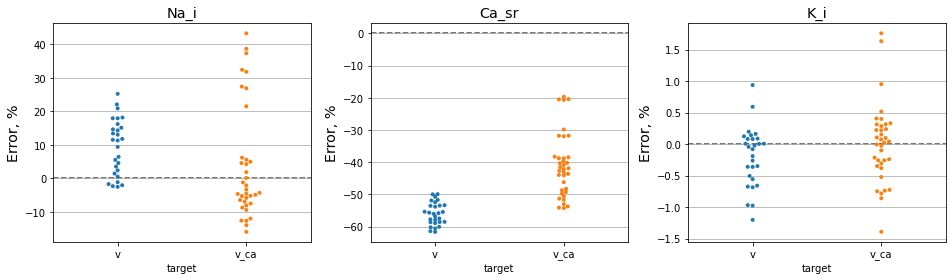

In [202]:
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.3))

for i, g_name in enumerate(items):

    ax = axes[i]
    
    sns.swarmplot(data=result[g_name], y='value', x='target',
                  dodge=True, size=4, ax=ax)
    
    ax.axhline(0, color='0.3', ls='--', zorder=-10)
    ax.set_title(g_name, size='x-large')
    ax.set_ylabel('Error, %', size='x-large')

    ax.grid(axis='y')

#     plt.ylabel('mM')
plt.tight_layout()
#plt.savefig(f"../images/synthetic/koivumaki/{g_name}.png")
plt.show()

In [19]:
# g = sns.catplot(x="CL", y="value",
#                 hue="target", col="g_name",
#                 data=df_conc, kind="swarm",
#                 #height=4, aspect=.7,
#                 )

# Duplicates

In [7]:
data = pd.read_csv("../misc/table_koivumaki_duplicates.csv", index_col=[0, 1], header=[0, 1, 2])
data

Group                              4                              \
Cell                               1                               
Case                   210331_083730 210407_180923 210407_184929   
common fitness             -0.215294     -0.192408     -0.210386   
       PNa                  1.137736      0.966342      0.512262   
       gCaL                 0.347566      0.178292      0.300292   
       gt                   0.965273      0.677180      0.622831   
       gKur                 0.597874      0.579335      0.865346   
       gK1                  0.146960      0.233845      0.454168   
       gKr                  9.804779      9.770333      6.442766   
       gKs                  0.310959      0.153807      0.138789   
       gNab                 0.113242      0.105620      0.107025   
       gCab                 0.116365      0.102286      0.101491   
       INaKmax              0.574917      0.401593      0.516884   
       ICaPmax              9.381231      9.132057      9.910457   
       gIf                  0.244175      0.138625      0.552083   
       kNaCa                0.401615      0.198859      0.476847   
       Jrel_multiplier      0.122748      0.416126      1.513584   
       cpumps               9.845320      0.844803      8.302146   
       kSRleak              0.253817      0.129326      0.311836   
       fluo_tot             0.089890      0.035643      0.152294   
2064   Nai                  4.132674      4.024749      4.326332   
       Ki                 149.197181    144.599301    145.535355   
       CaSR                 0.389710      0.372660      0.334717   
1032   Nai                  5.502382      5.182943      4.896832   
       Ki                 150.787811    145.871492    144.467110   
       CaSR                 0.621104      0.556930      0.481960   
516    Nai                  8.406119      8.265880      7.641902   
       Ki                 143.157719    147.202368    158.696035   
       CaSR                 1.202828      1.079885      0.867962   
344    Nai                 10.510322     10.719115      9.052227   
       Ki                 133.775208    143.105818    148.490485   
       CaSR                 1.987952      1.620319      1.299892   
258    Nai                 12.942823     13.182349     11.058357   
       Ki                 124.665106    130.770910    147.569094   
       CaSR                 3.092691      2.532797      2.006627   
common fluo_tot_uM          0.898896      0.356431      1.522942   

Group                                                             \
Cell                                                           7   
Case                   210407_192955 210407_201034 210404_203302   
common fitness             -0.211749     -0.206167     -0.123451   
       PNa                  0.706331      0.502181      3.591996   
       gCaL                 0.233467      0.316927      2.009309   
       gt                   0.711237      0.804541      9.412528   
       gKur                 0.586811      0.681712      2.074929   
       gK1                  0.296909      0.326849      0.841389   
       gKr                  9.482752      9.696015      2.999293   
       gKs                  0.135298      0.289974      2.233106   
       gNab                 0.101844      0.111775      0.548238   
       gCab                 0.109907      0.106027      0.783653   
       INaKmax              0.619152      0.503220      1.704004   
       ICaPmax              9.726922      9.031061      0.196695   
       gIf                  0.262679      0.383726      0.117160   
       kNaCa                0.438092      0.256691      3.038225   
       Jrel_multiplier      0.456765      1.053039      0.106884   
       cpumps               8.793070      9.752141      0.201051   
       kSRleak              1.688318      0.575113      0.493051   
       fluo_tot             0.113220      0.117553      0.028768   
2064   Nai                  4.009144      4.038889     

In [19]:
df_common = data.loc['common'][:-2].T.copy()
df_common = np.log10(df_common)
df_common = df_common.stack().reset_index()
df_common.rename(columns={'level_0': 'case', 0: 'x'}, inplace=True)
#df_common['target'] = df_common['case'].replace(target_dict)

In [20]:
df_common

,Group,Cell,Case,level_3,x
0,4,1,210331_083730,PNa,0.056042
1,4,1,210331_083730,gCaL,-0.458963
2,4,1,210331_083730,gt,-0.015350
3,4,1,210331_083730,gKur,-0.223390
4,4,1,210331_083730,gK1,-0.832801
...,...,...,...,...,...
155,4,7,210407_225515,gIf,-0.521044
156,4,7,210407_225515,kNaCa,0.419635
157,4,7,210407_225515,Jrel_multiplier,-0.806233
158,4,7,210407_225515,cpumps,-0.922224


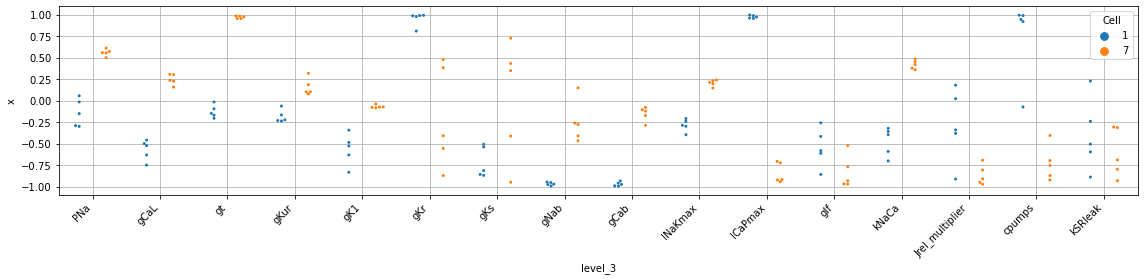

In [21]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.25))

sns.swarmplot(data=df_common, x='level_3', y='x', hue='Cell',
              dodge=True, size=3, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid()

plt.tight_layout()

#plt.savefig("../images/synthetic/koivumaki/currents.png")

In [22]:
df_common

,Group,Cell,Case,level_3,x
0,4,1,210331_083730,PNa,0.056042
1,4,1,210331_083730,gCaL,-0.458963
2,4,1,210331_083730,gt,-0.015350
3,4,1,210331_083730,gKur,-0.223390
4,4,1,210331_083730,gK1,-0.832801
...,...,...,...,...,...
155,4,7,210407_225515,gIf,-0.521044
156,4,7,210407_225515,kNaCa,0.419635
157,4,7,210407_225515,Jrel_multiplier,-0.806233
158,4,7,210407_225515,cpumps,-0.922224


# Stationarity

In [17]:
import numpy as np
import pandas as pd
import ctypes
import matplotlib.pyplot as plt

import time
import os

import sys
sys.path.append("../")

from src.helpers import update_array_from_kwargs, get_value_by_key

dirname = '../src/model_ctypes/_maleckar/'
filename_so = os.path.join(dirname, 'maleckar.so')
# items = ['Na_i', 'Ca_rel', 'K_i']

dirname = '../src/model_ctypes/_koivumaki/'
filename_so = os.path.join(dirname, 'koivumaki.so')
items = ['Nai', 'CaSR', 'Cai', 'Ki', 'V']

# dirname = '../src/model_ctypes/_grandi/'
# filename_so = os.path.join(dirname, 'model.so')
# items = ['Na_i', 'Ca_sr', 'K_i']


filename_so_abs = os.path.abspath(filename_so)

model = ctypes.CDLL(filename_so_abs)

# model.initialize_states_default.argtypes = [
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
#     np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
# ]

# model.initialize_states_default.restype = ctypes.c_void_p


model.run.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_int,
    ctypes.c_double,
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS')#,
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags='C_CONTIGUOUS'),
    #np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

model.run.restype = ctypes.c_int

legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')
legend_algebraic = legend_algebraic.iloc[:, :0]
legend_algebraic['value'] = 0.0

legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value']
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value']

In [19]:
result = {}

for case in tqdm(case_list, position=0):
    genes = pd.read_csv(os.path.join(folder_name_dst, case, 'genes_best.csv'), index_col=[0, 1])
    
    with open(os.path.join(folder_name_dst, case, 'config_backup.pickle'), 'rb') as f:
        config = pickle.load(f)
        
    CL_list = [2000, 1000, 666, 500]
    
    state = pd.DataFrame({str(CL): pd.read_csv(os.path.join(folder_name_dst, case, 'phenotype', f'phenotype_{CL}.csv')).iloc[-1]
                          for CL in CL_list})
    
    result[case] = {}

    for CL in tqdm(CL_list, position=1, leave=False):

        C, S = create_C_S(dict(genes=genes.iloc[:, 0], state=state), config, str(CL))
        
        t_sampling = config['t_sampling']
        stim_period = C[config['stim_period_legend_name']]
        n_samples_per_stim = int(stim_period / t_sampling)

        n_beats = 100
        tol = 1e-4

#         chain_length = 50
#         v_threshold = 1e-1
#         t_safe = 5e-2

        output = np.zeros((n_samples_per_stim * n_beats + 1, len(S)))
#         output_V = np.zeros((n_samples_per_stim * n_beats + 1, chain_length))

#         output_A = np.zeros((n_samples_per_stim * n_beats + 1, len(legend_algebraic)))
#         output_t = np.zeros((n_samples_per_stim * n_beats + 1))

        status = model.run(S.values.copy(), C.values.copy(),
                           n_beats, t_sampling, tol, output)

        #print(status)
        
        output = pd.DataFrame(output, columns=legend_states.index)
        
        err_abs = output.iloc[-1] - output.iloc[0]
        err_rel = err_abs / output.iloc[0] * 100

        df_err= pd.DataFrame([err_rel[items], err_abs[items]],
                             index=['err_rel', 'err_abs'])
        result[case][CL] = df_err

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
result = pd.concat({x: pd.concat({y: result[x][y] for y in result[x]}) for x in result})

In [21]:
result[:10]

name                             Nai      CaSR           Cai        Ki  \
210408_193146 2000 err_rel  1.475882  0.973488  9.753882e-01 -0.056973   
                   err_abs  0.144499  0.012723  2.140358e-06 -0.081076   
              1000 err_rel  0.861086  0.657572  6.771554e-01 -0.019466   
                   err_abs  0.096365  0.008438  1.435689e-06 -0.027159   
              666  err_rel  0.568559  0.511312  5.369494e-01 -0.002128   
                   err_abs  0.074215  0.006846  1.326160e-06 -0.002922   
              500  err_rel  0.398443  0.350295  3.909958e-01  0.010928   
                   err_abs  0.058831  0.004891  1.217283e-06  0.014814   
210408_213459 2000 err_rel -0.028409 -0.006657 -1.314052e-02  0.024287   
                   err_abs -0.002320 -0.000046 -1.851269e-08  0.033427   

name                               V  
210408_193146 2000 err_rel  0.159904  
                   err_abs -0.116953  
              1000 err_rel  0.081925  
                   err_abs -0.061960  
              666  err_rel  0.052300  
                   err_abs -0.040484  
              500  err_rel  0.038502  
                   err_abs -0.030121  
210408_213459 2000 err_rel  0.002957  
                   err_abs -0.002144

In [22]:
rel = result.loc[idx[:, :, 'err_rel'], :].reset_index(level=2, drop=True)
rel = rel.stack().reset_index()
rel['target'] = rel['level_0'].replace(target_dict)
rel = rel.rename(columns={0: 'y', 'name': 'x', 'level_1': 'CL'})
rel = rel.drop(columns=['level_0'])

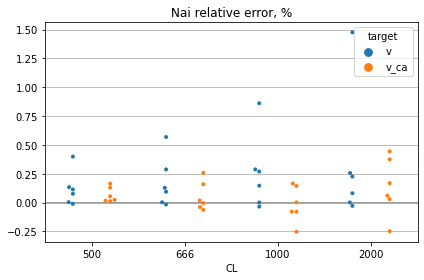

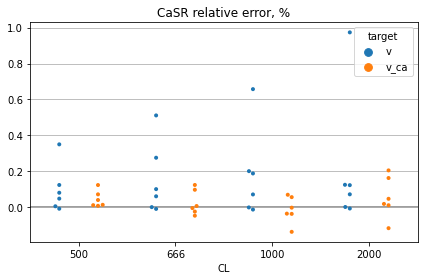

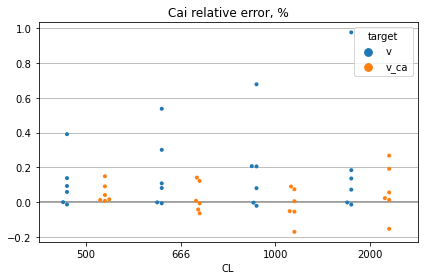

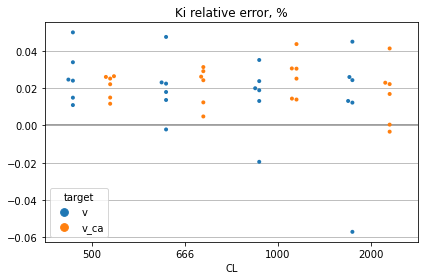

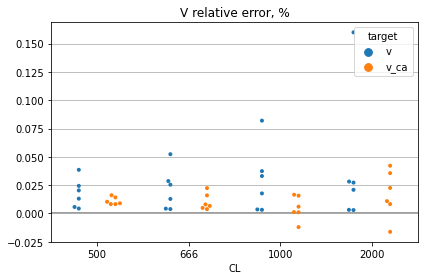

In [23]:
for x in rel.x.unique():

#     sns.violinplot(data=rel[rel.x == x],
#                   x='CL', y='y', hue='target', color='0.3',
#                   dodge=True, size=4, inner=None)
    sns.swarmplot(data=rel[rel.x == x],
                  x='CL', y='y', hue='target',
                  dodge=True, size=4)
    
    plt.axhline(color='0.5', zorder=-1)
    
    plt.ylabel('')
    plt.title(f'{x} relative error, %')
    plt.tight_layout()
    plt.grid(axis='y')
    #plt.savefig(f"../images/synthetic/koivumaki/stationarity/{x}.png")
    plt.show()

# Old

In [9]:
import os

In [10]:
dirname = "../data/kernik_clancy/IK1_x2_biphasic/phenotypes"

conc = {}

for CL in 2000, 1000, 500:
    CL = str(CL)
    phen = pd.read_csv(os.path.join(dirname, f'phenotype_{CL}.csv'))
    conc[CL] = phen.iloc[-1][['Nai', 'Ki', 'Ca_SR']]

In [11]:
df_conc_true = pd.DataFrame(conc).T.stack()
df_conc_true.name = 'true'

In [12]:
df_conc = pd.concat([df.loc[['2000', '1000', '500']], df_conc_true], axis=1)
#df_conc = pd.concat([df, df_conc_true], axis=1)

In [13]:
df_conc

210208_111459  210208_115045  210208_142104  210208_144953  \
2000 Nai         4.186351       4.148399       5.925632       4.100625   
     Ki        111.880635     112.732149     107.722010     108.839304   
     Ca_SR       0.030719       0.027943       0.074529       0.035855   
1000 Nai         4.574721       4.568871       6.704199       4.533464   
     Ki        109.695662     110.744428     104.081610     108.333364   
     Ca_SR       0.043088       0.026734       0.081918       0.036574   
500  Nai         5.553169       5.377421       8.252095       5.411999   
     Ki        109.035077     112.251135     103.159699     105.112090   
     Ca_SR       0.041528       0.041884       0.091516       0.045339   

            210208_185315        true  
2000 Nai         4.027939    6.545888  
     Ki        111.259367  105.400119  
     Ca_SR       0.014164    0.332073  
1000 Nai         4.266443    7.329580  
     Ki        112.408944  104.593083  
     Ca_SR       0.020258    0.336173  
500  Nai         4.867157    8.765476  
     Ki        108.417340  103.155543  
     Ca_SR       0.026855    0.340291

In [14]:
df_conc.to_csv("../misc/syn/sol_conc.csv")